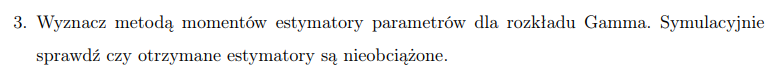

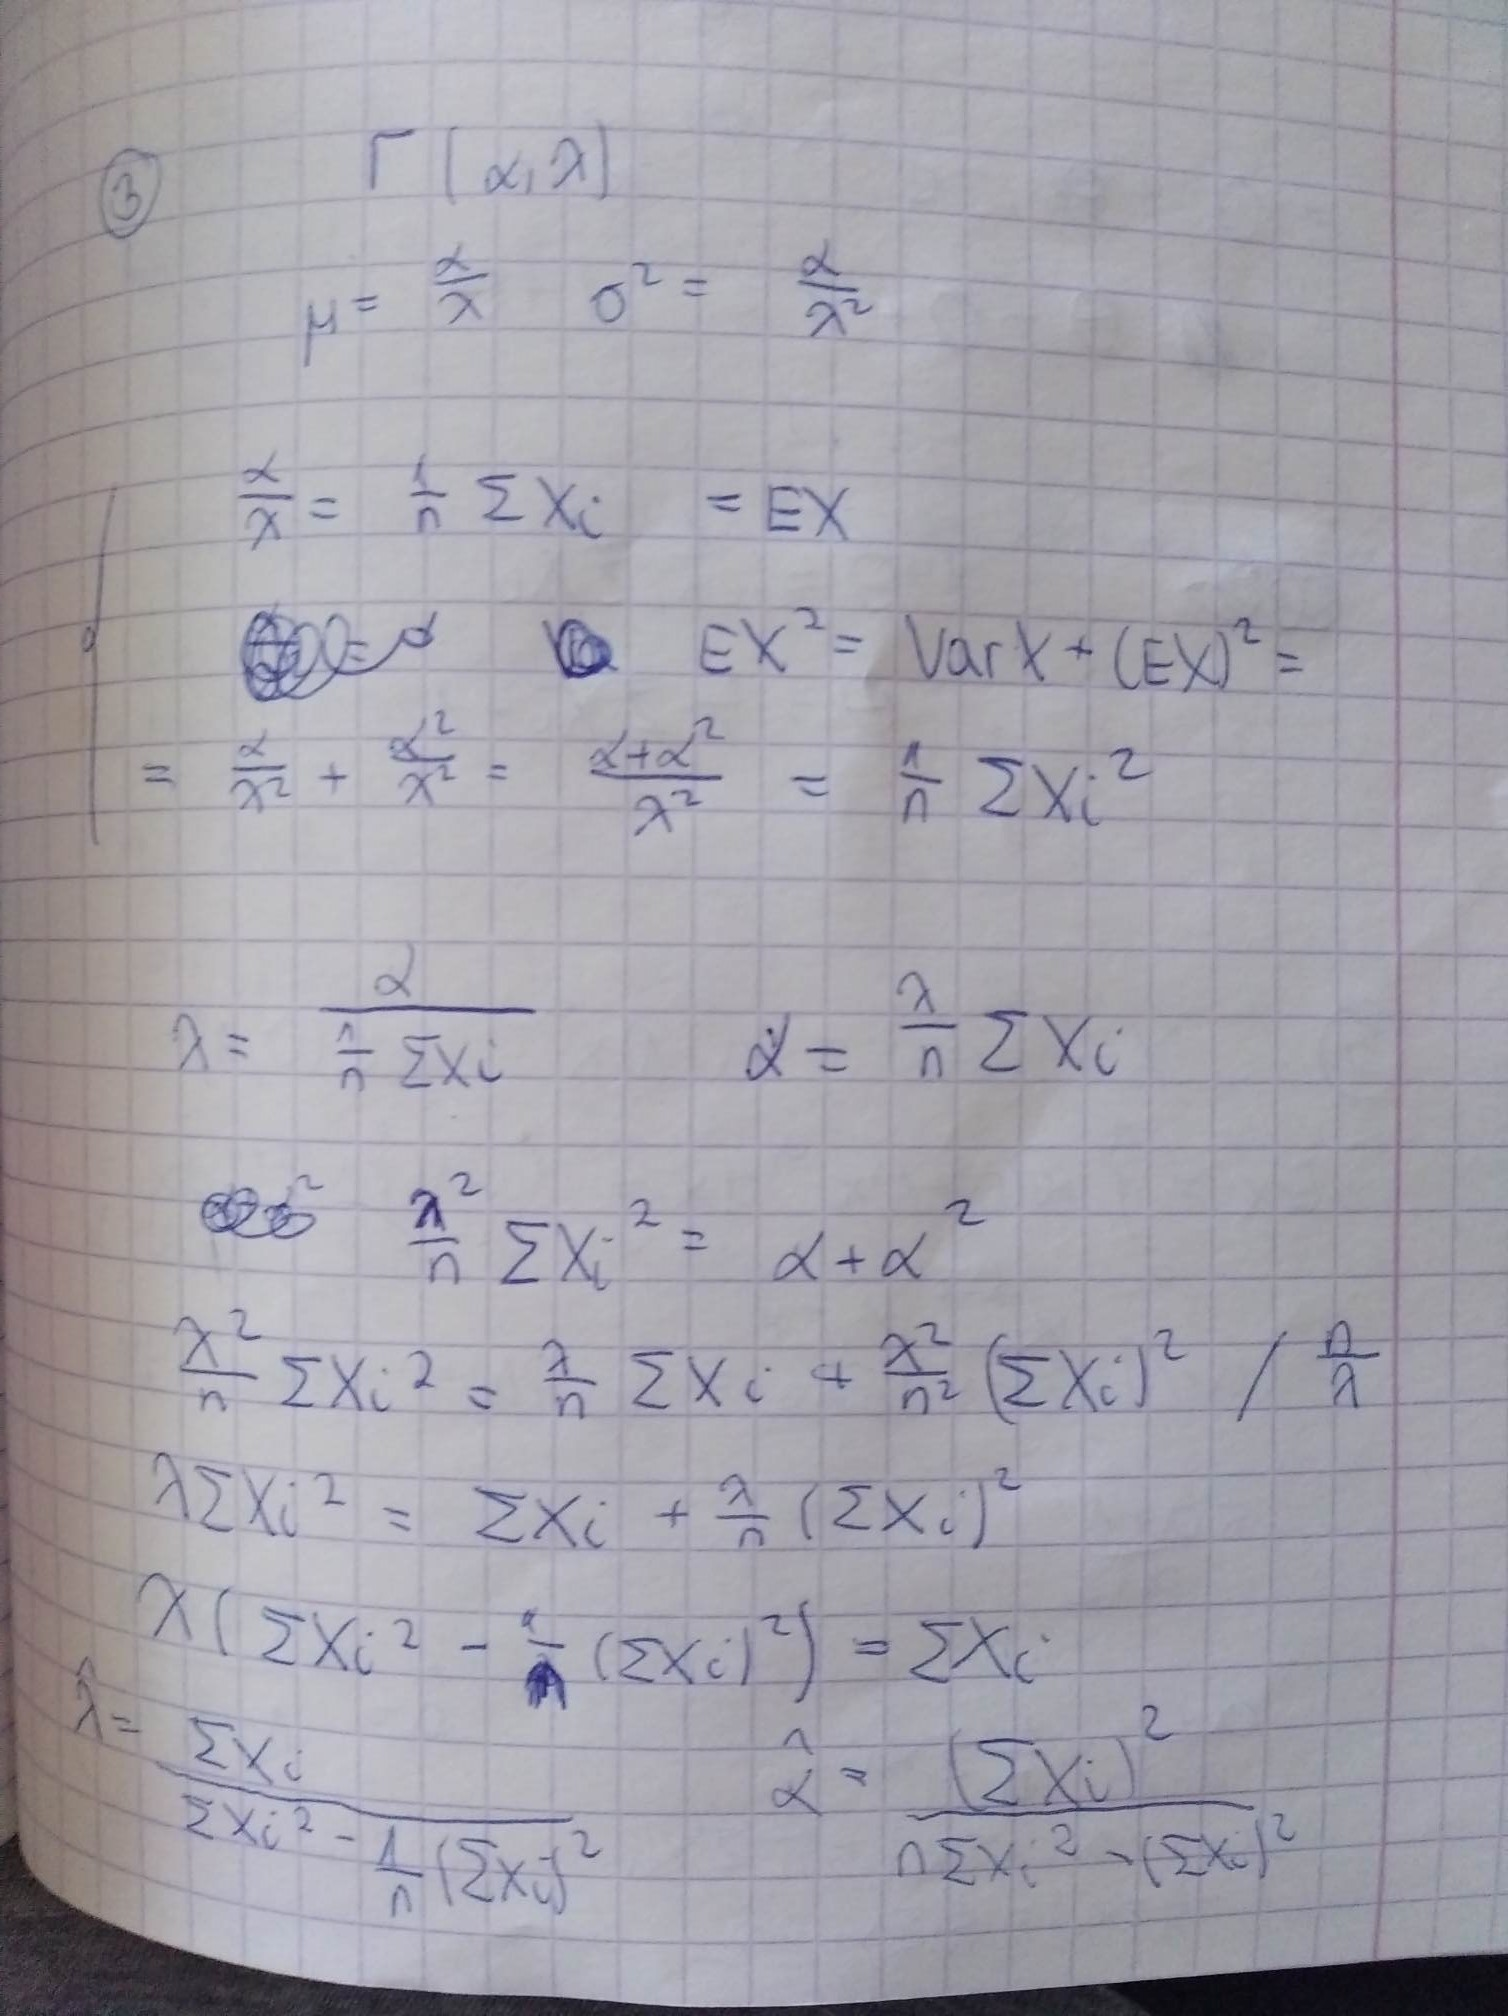

In [95]:
obciazenia <- function(n, alpha, lambda){
    est_alpha <- numeric()
    est_lambda <- numeric()
    for (i in 1:1000){
        X <- rgamma(n, alpha, 1/lambda)
        est_lambda[i] <- (sum(X))/(sum(X^2)-(1/n)*((sum(X))^2))
        est_alpha[i] <- (est_lambda[i]/n) * sum(X)
        }
    obc <- numeric()
    obc[1] <- mean(est_lambda) - 1/lambda
    obc[2] <- mean(est_alpha) - alpha
    return(obc)
    }

In [100]:
alpha <- 3
lambda <- 2
n_vec <- seq(20, 1000, 10)

obciaz_alpha <- numeric()
obciaz_lambda <- numeric()
i <- 1
for (n in n_vec){
    obciaz_alpha[i] <- obciazenia(n, alpha, lambda)[2]
    obciaz_lambda[i] <- obciazenia(n, alpha, lambda)[1]
    i <- i+1
}

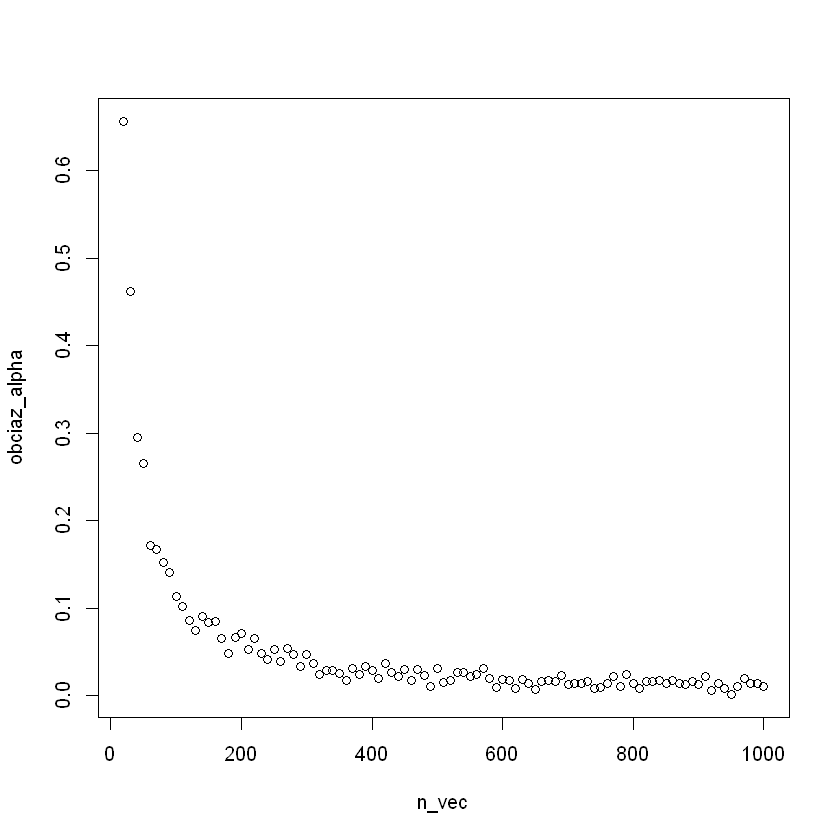

In [102]:
plot(n_vec, obciaz_alpha)

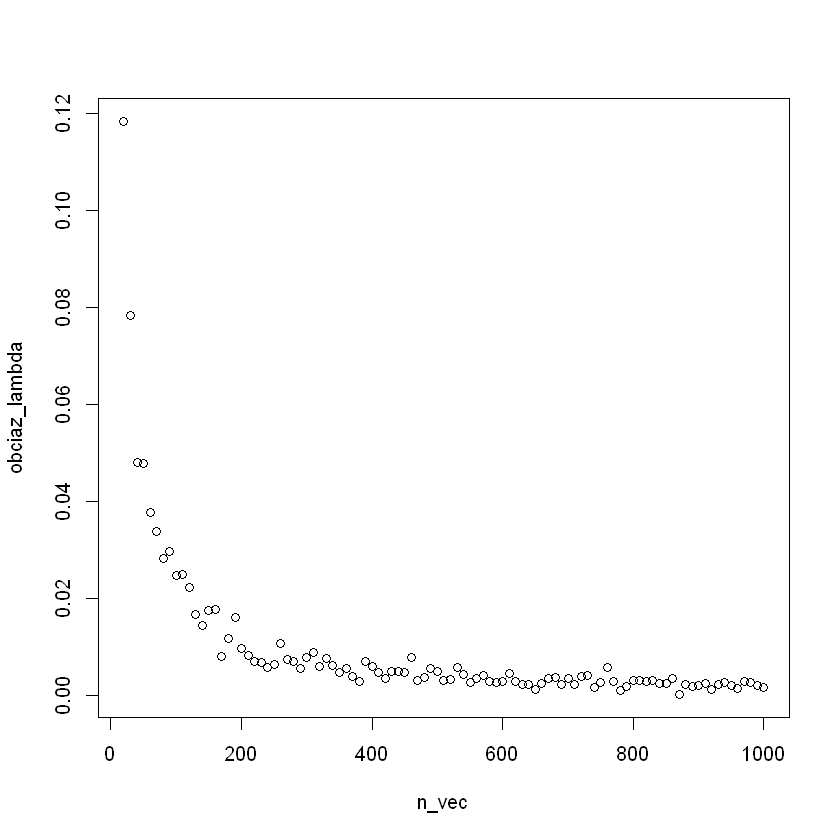

In [103]:
plot(n_vec, obciaz_lambda)

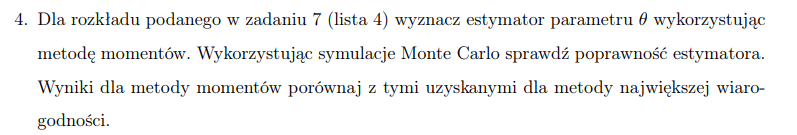

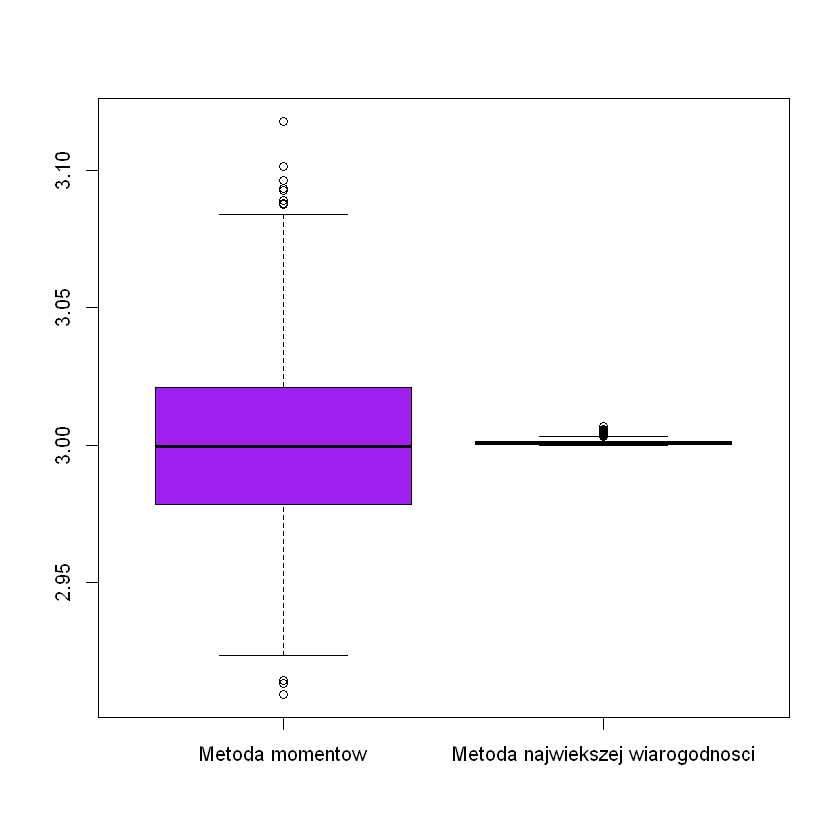

In [1]:
theta <- 3
n <- 1000

reversed_cdf <- function(n, theta){
  X <- runif(n)
  Y <- theta - log(1-X)
  return(Y)
}

theta_nw <- numeric()
theta_mm <- numeric()

for(i in 1:n){
    X <- reversed_cdf(n, theta)
    theta_nw[i] <- min(X)
    theta_mm[i] <- mean(X)-1
}
boxplot(theta_mm, theta_nw, names=c("Metoda momentow","Metoda najwiekszej wiarogodnosci"), col=c("purple", "pink"))

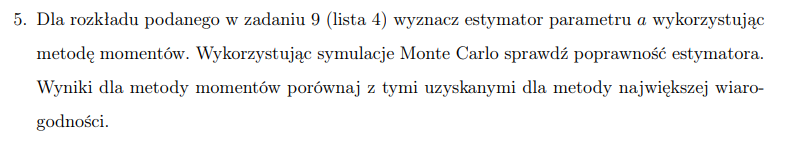

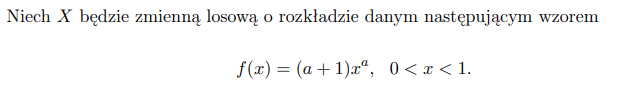

In [11]:
a <- 3
n <- 1000

sym_x <- function(a, n){
  X <- runif(n)^(1/(1+a))
  return(X)
}

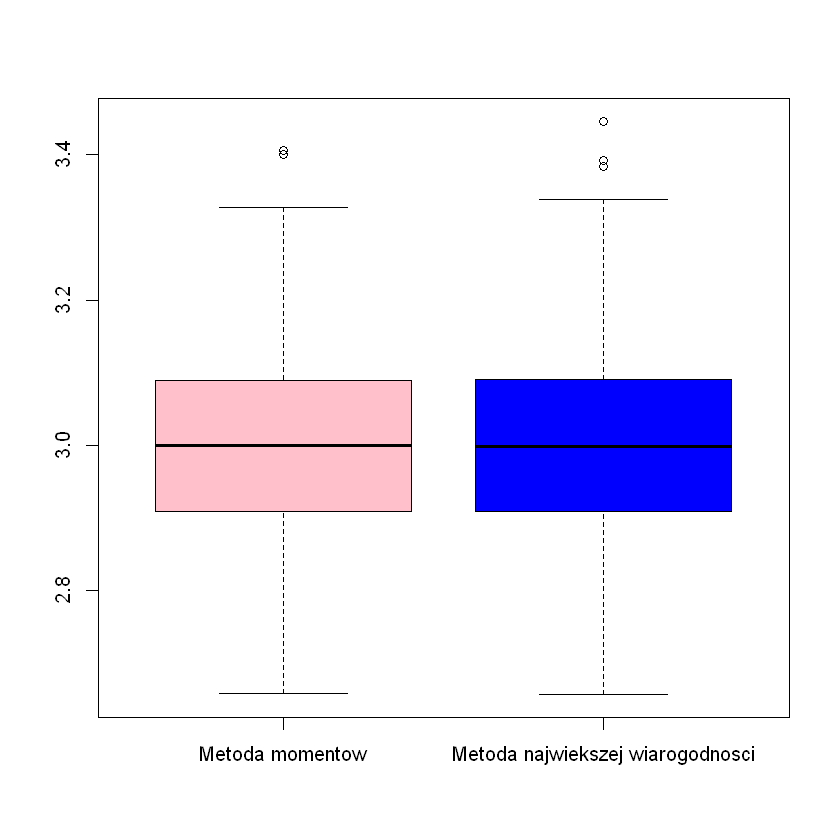

In [15]:
a_nw_vec <- numeric()
a_mm_vec <- numeric()

for(i in 1:n){
  X <- sym_x(a,n)
  a_nw_vec[i] <- -n/(sum(log(X)))-1
  a_mm_vec[i] <- (2*mean(X)-1)/(1-mean(X))
}

boxplot(a_nw_vec, a_mm_vec, names=c("Metoda momentow","Metoda najwiekszej wiarogodnosci"), col=c("pink", "blue"))
